<a href="https://colab.research.google.com/github/FatemeZamanian/Titanic/blob/master/titanic_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [2]:
data=pd.read_csv('/content/drive/MyDrive/train.csv')
data=data.replace(["male","female"],[0,1])
data=data.replace(["S","C","Q"],[0,1,2])
data=data.fillna(0)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0.0


In [3]:
Y_train=data[['Survived']]
X_train=data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y_train=np.array(Y_train)
X_train=np.array(X_train)
print(X_train.shape)
print(Y_train.shape)

(891, 7)
(891, 1)


In [4]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Dense(7,activation="relu"),
                                  tf.keras.layers.Dense(128,activation="relu"),
                                  tf.keras.layers.Dense(512,activation="relu"),
                                  tf.keras.layers.Dense(2,activation="sigmoid")
])

In [5]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [13]:
out=model.fit(X_train,Y_train,epochs=500)

Epoch 1/500
28/28 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.6072
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 0.7283 - accuracy: 0.6195
Epoch 3/500
28/28 [==============================] - 0s 2ms/step - loss: 0.7116 - accuracy: 0.6285
Epoch 4/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.6364
Epoch 5/500
28/28 [==============================] - 0s 2ms/step - loss: 0.7043 - accuracy: 0.6554
Epoch 6/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.6813
Epoch 7/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.6633
Epoch 8/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.6599
Epoch 9/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.6689
Epoch 10/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.6622
Epoch 11/

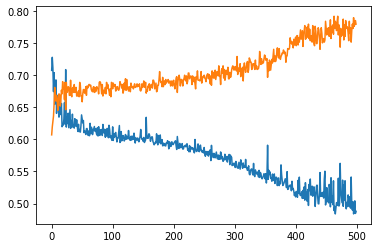

In [14]:
plt.plot(out.history['loss'])
plt.plot(out.history['accuracy'])

In [15]:
data_test = pd.read_csv('/content/drive/MyDrive/test.csv')
data_test=data_test.replace(["male","female"],[0,1])
data_test=data_test.replace(["S","C","Q"],[0,1,2])
data_test=data_test.fillna(0)

X_test=data_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

Y = pd.read_csv('/content/drive/MyDrive/gender_submission.csv')
Y_test = Y[['Survived']]

Y_test = np.array(Y_test)
X_test = np.array(X_test)

In [18]:
model.evaluate(X_test,Y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.8828


[0.3701232373714447, 0.8827751278877258]

In [19]:
Y_pred = model.predict(X_test)
predict = np.argmax(Y_pred, axis = 1)
predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [10]:
model.save('/content/drive/MyDrive')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/assets


In [20]:
class KNearestNeighbors:
    def __init__(self, k):
        self.k = k
        
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        self.number_class = len(np.unique(y_train))
        
    def distance(self,a,b):
        dis = np.sqrt(np.sum((a-b)**2, axis = 1))
        return dis
        
    def nearestNeighbors(self, x_test):
        point_dist=[]
        for x in x_test:
            point_dist.append(self.distance(x,self.x_train))
            
        neigh_ind=[]
        for row in point_dist:
            near_neighbor = np.argsort(row)[:self.k]
            neigh_ind.append(near_neighbor)
            
        return np.array(neigh_ind)
    
    def predict(self, x_test):
        neighbors = self.nearestNeighbors(x_test)
        y_pred=[]
        for neighbor in neighbors:
            y_pred.append(np.argmax(np.bincount(self.y_train[neighbor])))
        return np.array(y_pred)
    
    def evaluate(self,x_test,y_test):
        temp=[]
        c=0
        self.x_test=x_test
        self.y_test=y_test
        temp=self.predict(self.x_test)
        for i in range(len(self.x_test)):
            if temp[i]==self.y_test[i]:
                c+=1
        ev=c/len(y_test)
        return ev

In [21]:
Y_train = Y_train.reshape(-1,)
knn=KNearestNeighbors(k=5)
knn.fit(X_train,Y_train)
acc=knn.evaluate(X_test,Y_test)
print(acc)

0.6555023923444976


In [22]:
class Adaline:
    def __init__(self):
        pass
    def fit(self,x_train,y_train):
        # m=(X.T*X)^-1*X.T*Y
        self.m=np.matmul(inv(np.matmul(x_train.T,x_train)),np.matmul(x_train.T,y_train))
        return self.m
    
    def predict(self, x_test):
        y_predict = np.matmul(x_test, self.m)
        y=[]
        for i in range(len(y_predict)):
            if y_predict[i]<0.01:
                y.append(0)
            else:
                y.append(1)  
        y=np.array(y)
        return y
    
    def evaluate(self,X_test,Y_test):
        y_predict = self.predict(X_test)
        count=0
        for i in range(len(Y_test)):
            if y_predict[i]==Y_test[i]:
                count+=1
        ev=count/len(Y_test)
        return ev

In [23]:
Adl=Adaline()
Adl.fit(X_train,Y_train)
y_pr=Adl.predict(X_test)
acc=Adl.evaluate(X_test,Y_test)
print(acc)

0.37559808612440193


In [130]:
class Perceptron:
  def __init__(self):
    self.w = np.random.rand(7, 1)
    self.b = np.random.rand(1, 1)
  def fit(self,lrate,ep,X,Y):
    self.X_train = X_train
    self.Y_train = Y_train
    self.number_class = len(np.unique(Y_train))
    lr=lrate
    epochs=ep

    for j in range(epochs):
        for i in range(X.shape[0]):
          Y_pred = np.matmul(self.X_train[i], self.w) + self.b
          e = self.Y_train[i] - Y_pred
          a = lr * self.X_train[i, :].T * e
          
          self.w += a.T
          self.b += lr * e
          
          np.save('w', self.w)
          np.save('b', self.b)

    return Y_pred

  def predict(self,X_test):
    w = np.load('w.npy')
    b = np.load('b.npy')
    Y_pred = np.matmul(X_test, w) + b
    predic = []
    for pred in (Y_pred):
      if pred > 1:
          predic.append([1])
      elif pred < 1:
          predic.append([0])
    return predic

  
  def evaluate_acc(self,X_test,Y_test):
    w = np.load('w.npy')
    b = np.load('b.npy')
    Y_pred=self.predict(X_test)
    count=0
    for i in range(len(Y_test)):
      if Y_pred[i]==Y_test[i]:
        count+=1
    acc=count/len(Y_test)
    return acc
    





In [131]:
Y_train = Y_train.reshape(-1,1)
prc = Perceptron()
y = prc.fit(0.001,2,X_train, Y_train)
prc.predict(X_test)
acc = prc.evaluate_acc(X_test,Y_test)
print(acc)

0.3803827751196172
